In [1]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import numpy as np
import pandas as pd
import yfinance as yf
from pathlib import Path
from sklearn.model_selection import train_test_split
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

In [2]:
stock = 'MSFT'
df = yf.download(stock,'2010-12-01', '2020-12-02')

df['Daily Returns'] = df['Close'].pct_change()


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Daily Returns,50 Day MA,Upper,Lower
Date,,,,,,,,,,
2011-02-10,27.930000,27.940001,27.290001,27.500000,21.864422,76672400,-0.016804,27.9144,28.636182,27.150287
2011-02-11,27.760000,27.809999,27.070000,27.250000,21.665649,83939700,-0.009091,27.9386,28.268699,27.072745
2011-02-14,27.209999,27.270000,26.950001,27.230000,21.649748,56766200,-0.000734,27.9454,28.224377,26.999058
2011-02-15,27.040001,27.330000,26.950001,26.959999,21.561775,44116500,-0.009916,27.9442,27.959069,26.921693
2011-02-16,27.049999,27.070000,26.600000,27.020000,21.609766,70817900,0.002226,27.9478,28.004014,26.868434


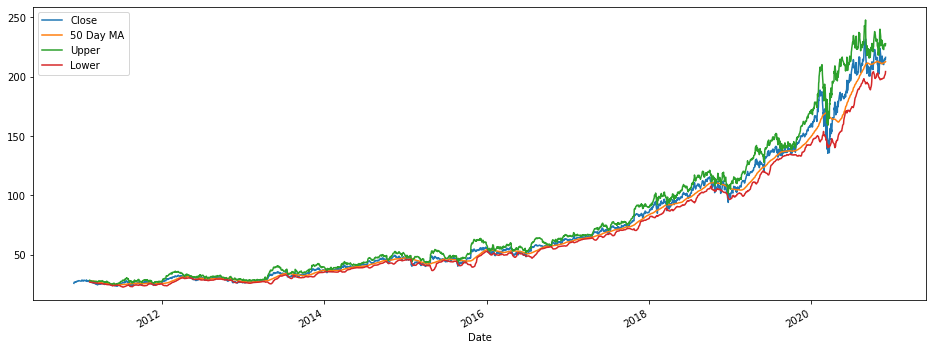

In [3]:
# Bolllinger Analysis Bands

#Close 50 MA

df['50 Day MA'] = df['Close'].rolling(window = 50).mean()

#Upper = 50 MA + 2*std(50 days)

df['Upper'] = df['Close'] + 2*(df['Close'].rolling(50).std())

#Lower = 50 MA - 2*std(50 days)

df['Lower'] = df['50 Day MA'] - 2*(df['Close'].rolling(20).std())

#Plot the Data

df[['Close','50 Day MA','Upper','Lower']].plot(figsize = (16,6))

df.dropna(inplace=True)
df.head()

In [4]:
# New Trading Signals

# Buy when Close price is higher than the upper band, Sell when it is the lower than the lower band, Hold when it is between

# 1.0 -- Buy
# 0.0 -- Hold
# -1.0 -- Sell


df['Signal'] = np.where(df['Close'] < df['Lower'], -1.0,
                        (np.where(df['Close'] > df['Upper'], 1.0,
                                  np.where(df['Close'] != 0.0 , 0.0, 1.0))))
                            
df.head()

,Open,High,Low,Close,Adj Close,Volume,Daily Returns,50 Day MA,Upper,Lower,Signal
Date,,,,,,,,,,,
2011-02-10,27.930000,27.940001,27.290001,27.500000,21.864422,76672400,-0.016804,27.9144,28.636182,27.150287,0.0
2011-02-11,27.760000,27.809999,27.070000,27.250000,21.665649,83939700,-0.009091,27.9386,28.268699,27.072745,0.0
2011-02-14,27.209999,27.270000,26.950001,27.230000,21.649748,56766200,-0.000734,27.9454,28.224377,26.999058,0.0
2011-02-15,27.040001,27.330000,26.950001,26.959999,21.561775,44116500,-0.009916,27.9442,27.959069,26.921693,0.0
2011-02-16,27.049999,27.070000,26.600000,27.020000,21.609766,70817900,0.002226,27.9478,28.004014,26.868434,0.0


In [5]:
# X is the input variable

X = df[['Open', 'High', 'Low', 'Close']]

# Y is the target

y = df[['Signal']]

In [6]:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [7]:
scaler = StandardScaler()

X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [8]:

rf_model  = RandomForestClassifier(random_state=5)

In [9]:
rf_model = rf_model.fit(X_train_scaled, y_train)

In [10]:
predictions = rf_model.predict(X_test_scaled)

In [11]:
# Calculating the confusion matrix

cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual -1", "Actual 0"], columns=["Predicted -1", "Predicted 0"]
)


In [12]:
# Calculating the accuracy score

acc_score = accuracy_score(y_test, predictions)

In [13]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted -1,Predicted 0
Actual -1,16,25
Actual 0,20,557


Accuracy Score : 0.9271844660194175
Classification Report
              precision    recall  f1-score   support

        -1.0       0.44      0.39      0.42        41
         0.0       0.96      0.97      0.96       577

    accuracy                           0.93       618
   macro avg       0.70      0.68      0.69       618
weighted avg       0.92      0.93      0.92       618



In [14]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Daily Returns,50 Day MA,Upper,Lower,Signal
Date,,,,,,,,,,,
2011-02-10,27.930000,27.940001,27.290001,27.500000,21.864422,76672400,-0.016804,27.9144,28.636182,27.150287,0.0
2011-02-11,27.760000,27.809999,27.070000,27.250000,21.665649,83939700,-0.009091,27.9386,28.268699,27.072745,0.0
2011-02-14,27.209999,27.270000,26.950001,27.230000,21.649748,56766200,-0.000734,27.9454,28.224377,26.999058,0.0
2011-02-15,27.040001,27.330000,26.950001,26.959999,21.561775,44116500,-0.009916,27.9442,27.959069,26.921693,0.0
2011-02-16,27.049999,27.070000,26.600000,27.020000,21.609766,70817900,0.002226,27.9478,28.004014,26.868434,0.0
